In [10]:
# Importing input file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
input_data=pd.read_csv('Sales_add.csv')
#Reading the data from the excel sheet

In [11]:
#displaying the input data 
input_data.head()


,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [12]:
#Checking null values
input_data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [13]:
#Shape of Dataset
input_data.shape

(22, 5)

In [14]:
#infomation about the dataset
input_data.info

<bound method DataFrame.info of        Month  ... Sales_After_digital_add(in $)
0    Month-1  ...                        270390
1    Month-2  ...                        223334
2    Month-3  ...                        244243
3    Month-4  ...                        231808
4    Month-5  ...                        258402
5    Month-6  ...                        256948
6    Month-7  ...                        222106
7    Month-8  ...                        230637
8    Month-9  ...                        226261
9   Month-10  ...                        193735
10  Month-11  ...                        203175
11  Month-12  ...                        276279
12  Month-13  ...                        205180
13  Month-14  ...                        253131
14  Month-15  ...                        229336
15  Month-16  ...                        187305
16  Month-17  ...                        234908
17  Month-18  ...                        191517
18  Month-19  ...                        227040
19  Mont

In [15]:
#From the above table its clear that there are 22 rows and the data set is less
#Q1 The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.
# Solution : T Test 
input_data.describe()


,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


# From the above information seeing the mean its clear that there was an increase in the sales after switiching to Digital Promotion
#H0: Average sales before digital add is less than or equal to average sale after digital add
#H1: Average sales before digial add is greater than average sale after digital add

In [17]:
t_value,p_value= stats.ttest_rel(input_data['Sales_After_digital_add(in $)'], input_data['Sales_before_digital_add(in $)'])

In [18]:
print('T Test Value :',round(t_value,5))
print('p value :',round(p_value,3))

T Test Value : 12.09071
p value : 0.0


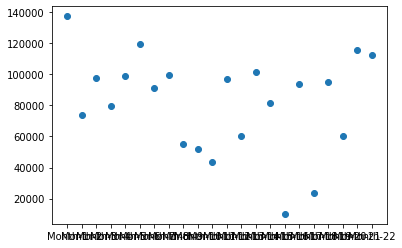

In [38]:
#Visualisation to Justify
x= input_data['Sales_After_digital_add(in $)']
y= input_data['Sales_before_digital_add(in $)']
difference=x-y
data_month=input_data['Month']
from matplotlib import pyplot
pyplot.scatter(data_month, difference)
pyplot.show()


This help to Convey that H1 is valid (ie sales after digital add get increased before

In [ ]:
#The company needs to check whether there is any dependency between the features “Region” and “Manager”.

In [40]:
crosstab=pd.crosstab(input_data['Region'],input_data['Manager'])

In [41]:
crosstab
#Display the contents

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


To find it we do a Chi-square test for dependency

**H0:** Region and Mangaers are dependent on each other
**H1:** Region and Manager are indepent on each other

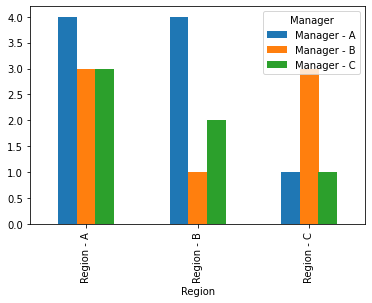

In [42]:
crosstab.plot(kind='bar')

In [46]:
chi2,p,dof,exp_freq =stats.chi2_contingency(crosstab)
print('Chi Square Test value:',round(chi2,5))
print('Chi square p- value',round(p,5))

Chi Square Test value: 3.05057
Chi square p- value 0.5494


In [ ]:
Here we can see that p value is greater than .5 so H1 will get considered

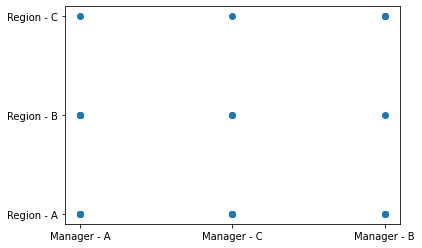

In [48]:
#Ploting corelation graph for justification
data_manager=input_data['Manager']
data_region=input_data['Region']
# plot
from matplotlib import pyplot
pyplot.scatter(data_manager, data_region)
pyplot.show()